In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day42-outlier-removal-using-zscore/placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


/tmp/ipykernel_4197/2061823567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

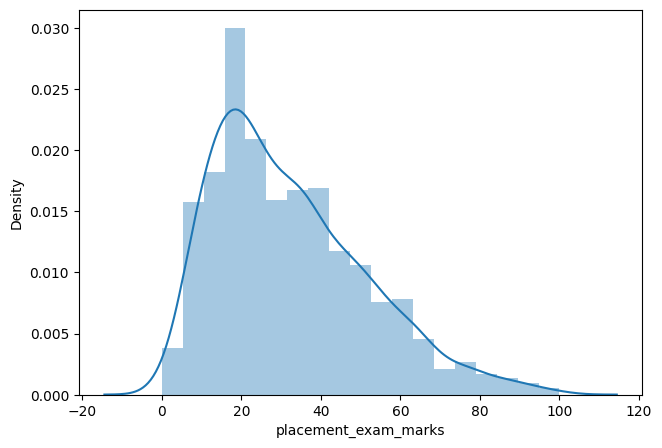

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df['placement_exam_marks'])

In [6]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

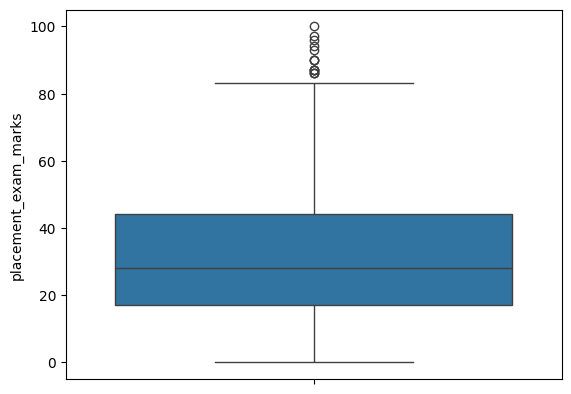

In [7]:
sns.boxplot(df['placement_exam_marks'])

In [10]:
p25=df['placement_exam_marks'].quantile(0.25)
p75=df['placement_exam_marks'].quantile(0.75)

In [14]:
a=p75-p25
a

np.float64(27.0)

In [15]:
upper_limit=p75+1.5*a
lower_limit=p25-1.5*a

In [16]:
print("Upper Limit",upper_limit)
print("Lower Limit",lower_limit)

Upper Limit 84.5
Lower Limit -23.5


Outliers

In [17]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [18]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


Trimming

In [19]:
new_df=df[df['placement_exam_marks']<upper_limit]

In [20]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


/tmp/ipykernel_4197/2827887995.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/tmp/ipykernel_4197/2827887995.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


<Axes: ylabel='placement_exam_marks'>

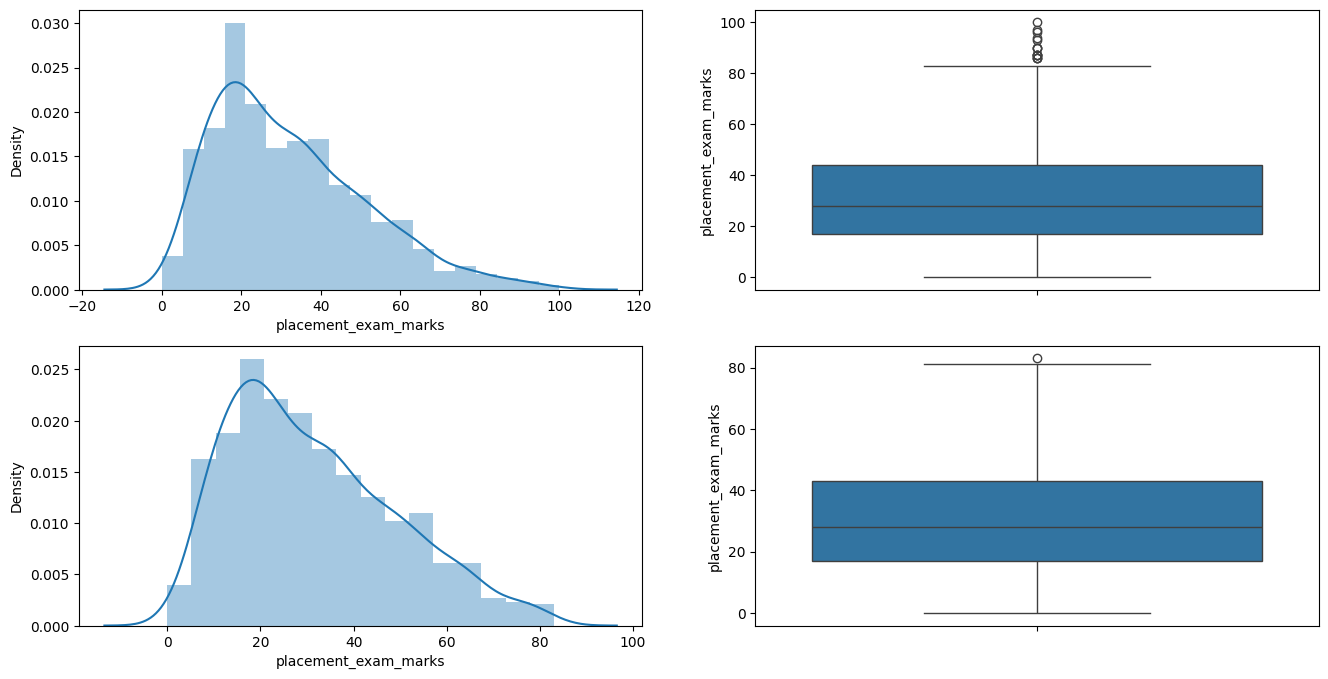

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])
plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(223)
sns.distplot(new_df['placement_exam_marks'])
plt.subplot(224)
sns.boxplot(new_df['placement_exam_marks'])

Capping

In [28]:
new_df_cap=df.copy()
new_df_cap['placement_exam_marks']=np.where(new_df_cap['placement_exam_marks']>upper_limit,upper_limit,np.where(new_df_cap['placement_exam_marks']<lower_limit,lower_limit,new_df_cap['placement_exam_marks']))

/tmp/ipykernel_4197/3161290318.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])
/tmp/ipykernel_4197/3161290318.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


<Axes: ylabel='placement_exam_marks'>

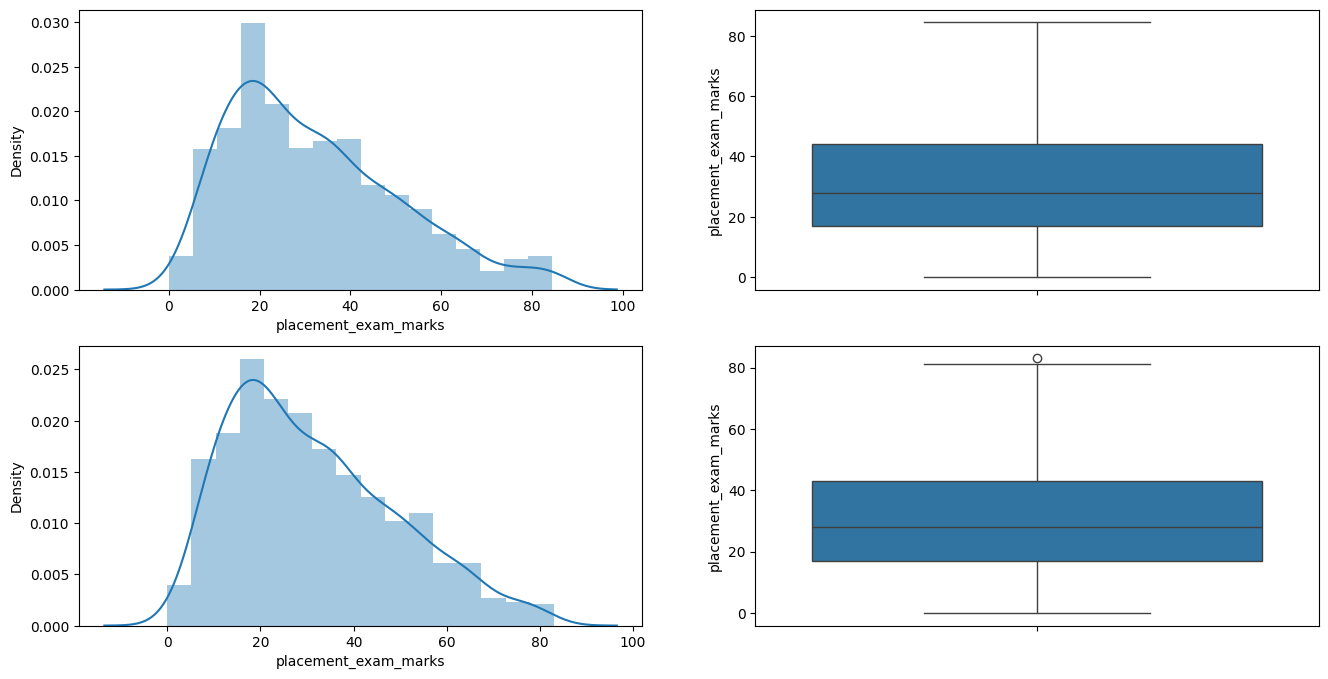

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(new_df_cap['placement_exam_marks'])
plt.subplot(222)
sns.boxplot(new_df_cap['placement_exam_marks'])
plt.subplot(223)
sns.distplot(new_df['placement_exam_marks'])
plt.subplot(224)
sns.boxplot(new_df['placement_exam_marks'])